# 1 Load libraries

In [99]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import *
import scipy

# 2 Load train and test datasets

In [100]:
df_train = pd.read_csv("tmdb-box-office-prediction/train.csv")
df_test = pd.read_csv("tmdb-box-office-prediction/test.csv")

# 3 Data Statistics Analysis

In [101]:
print("Training dataset information")
df_train.info()

Training dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998

In [102]:
print("Testing dataset information")
df_test.info()

Testing dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 

In [103]:
df_train.head(10)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,2/16/96,100.0,"[{'

In [104]:
df_test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [105]:
df_train.describe(include=None)

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [106]:
df_train.describe(include="all")

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,...,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,...,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt2637294,en,Joshua,"When Lou, who has become the ""father of the In...",NaN,...,9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,The Magnificent Seven,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,...,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,...,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,...,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,...,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,...,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,...,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


Text(0.5, 1.0, 'Count Columns By Datatypes')

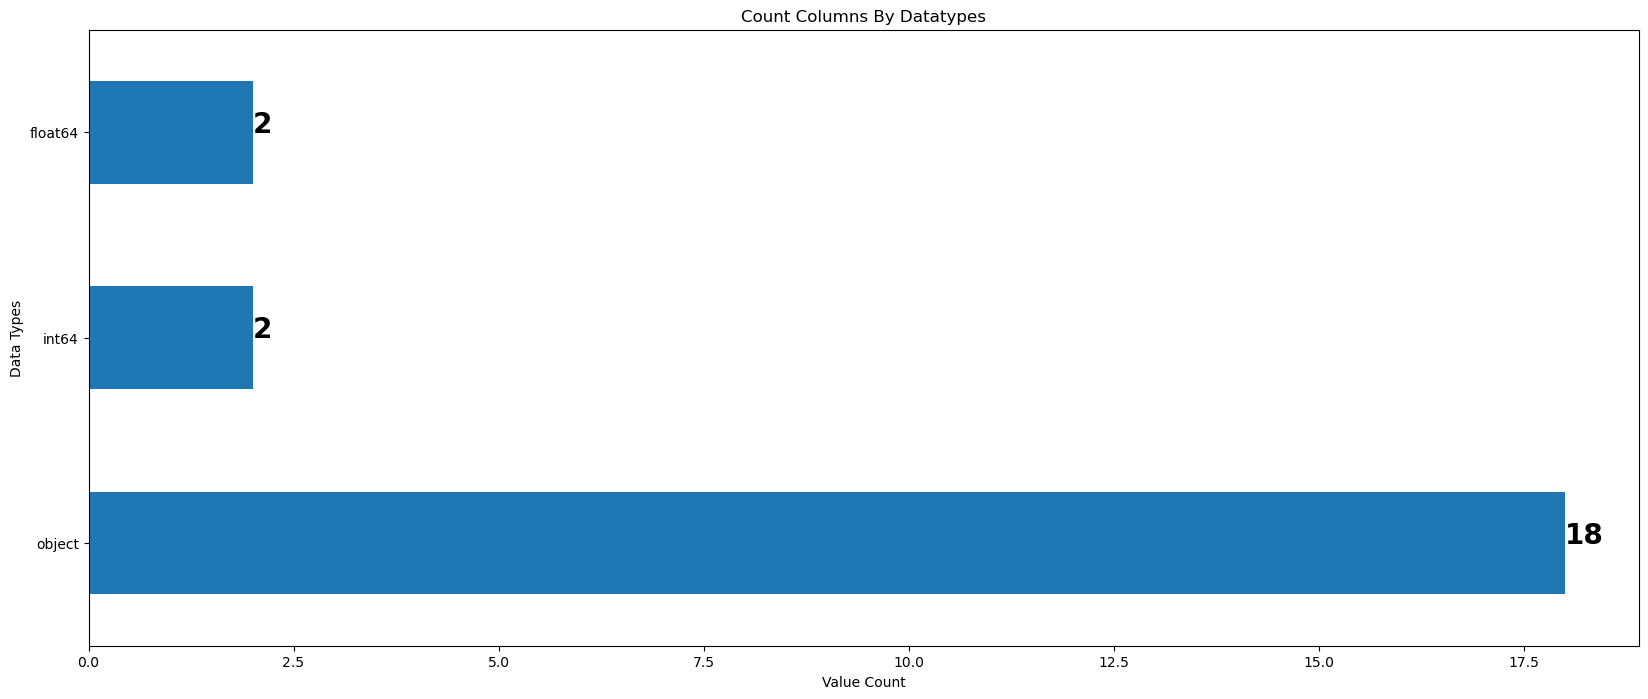

In [107]:
df_test.dtypes.value_counts().plot(kind="barh", figsize=(20,8))
for i, v in enumerate(df_test.dtypes.value_counts()):
    plt.text(v, i, str(v), fontweight='bold', fontsize = 20)
plt.xlabel("Value Count")
plt.ylabel("Data Types")
plt.title("Count Columns By Datatypes")

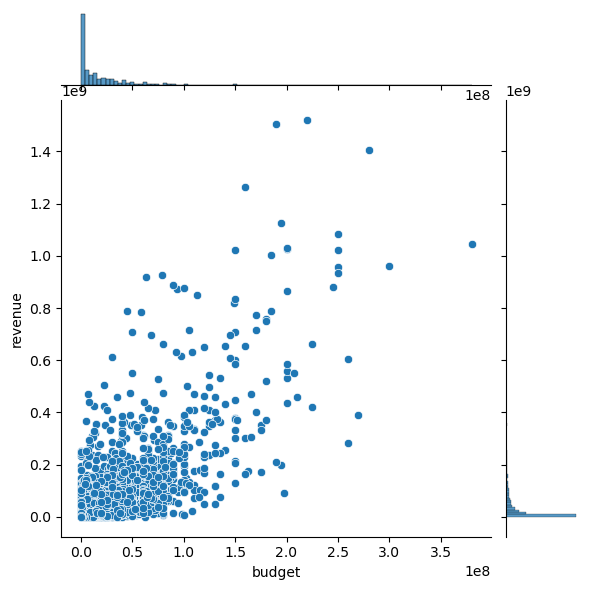

In [108]:
sns.jointplot(x = "budget", y = "revenue", data = df_train)
plt.show()

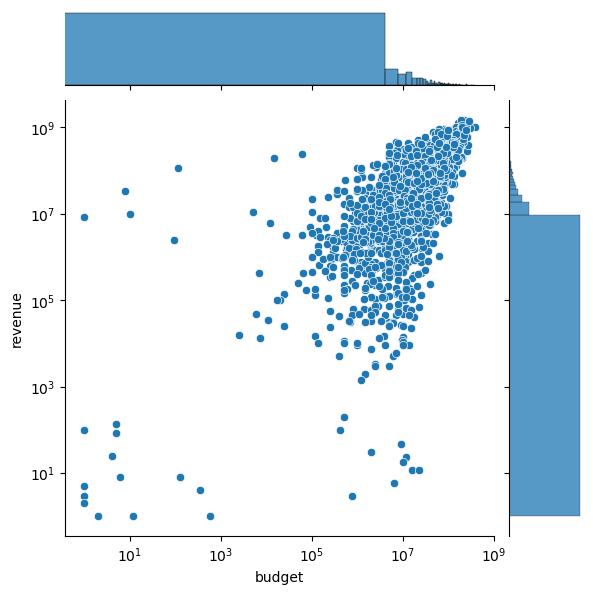

In [109]:
g = sns.jointplot(x = "budget", y  = "revenue", data = df_train)
g.ax_joint.set(xscale= "log", yscale = "log")
plt.show()

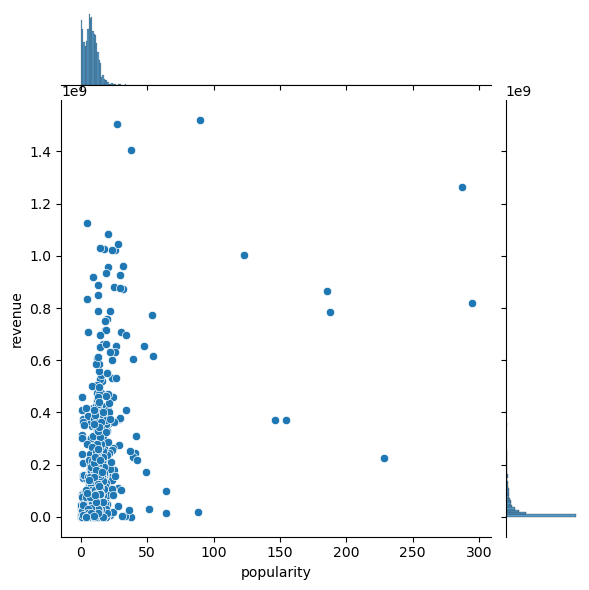

In [110]:
sns.jointplot(x = "popularity", y = "revenue", data = df_train)

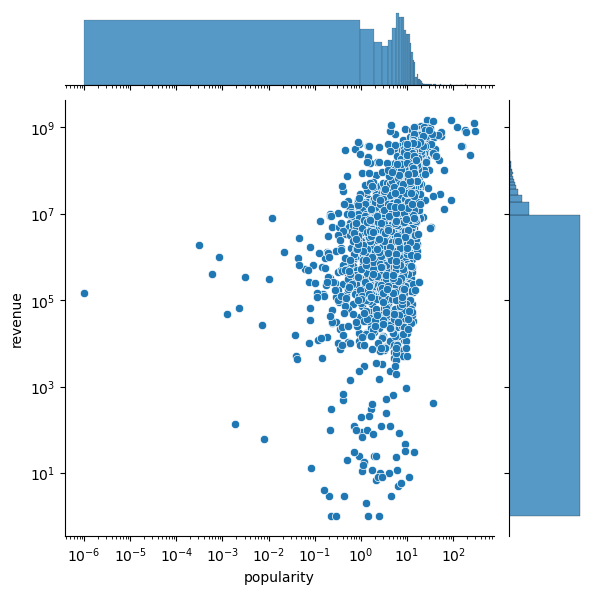

In [111]:
g = sns.jointplot(x = "popularity", y = "revenue", data = df_train)
g.ax_joint.set(xscale= "log", yscale = "log")
plt.show()

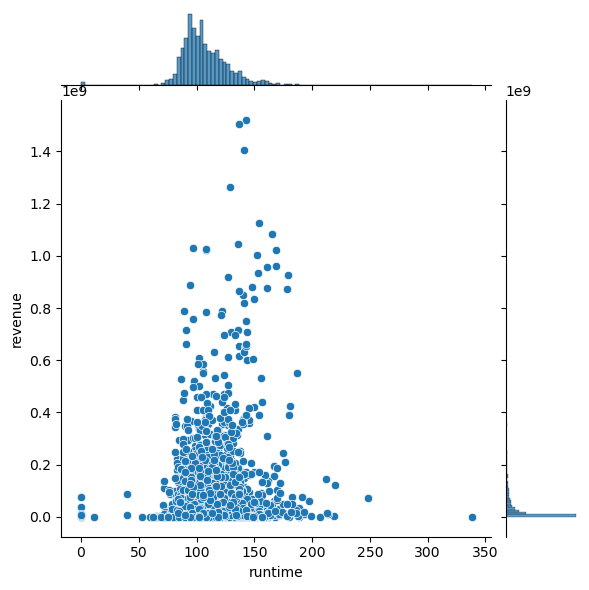

In [112]:
sns.jointplot(x = "runtime", y = "revenue", data = df_train)

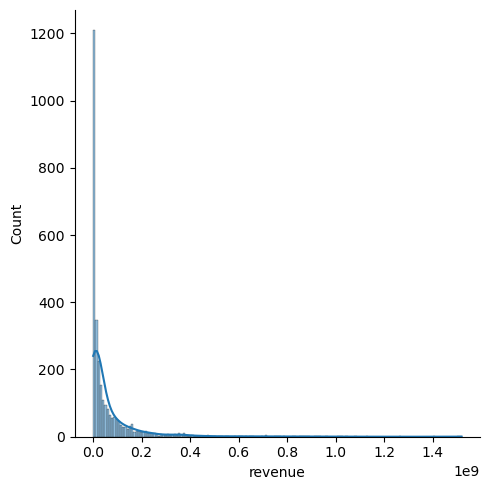

In [113]:
sns.displot(df_train.revenue, kde = True)

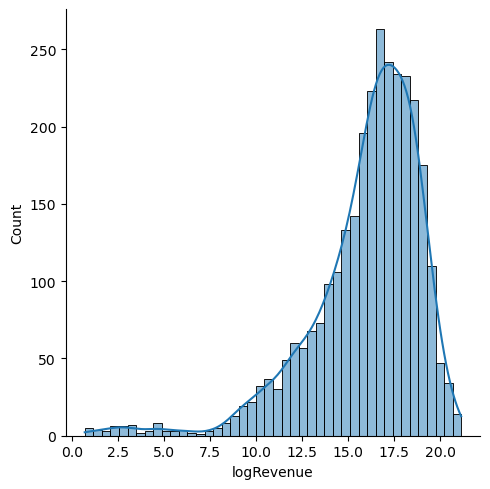

In [114]:
df_train["logRevenue"] = np.log1p(df_train.revenue)
sns.displot(df_train.logRevenue, kde = True)

In [115]:
df_train[["releaseMonth", "releaseDay", "releaseYear"]] = df_train.release_date.str.split('/',expand = True).replace(np.nan, -1).astype(int)
df_train["releaseYear"] = df_train["releaseYear"].apply(lambda x: x + 2000 if x < 20 else x + 1900)

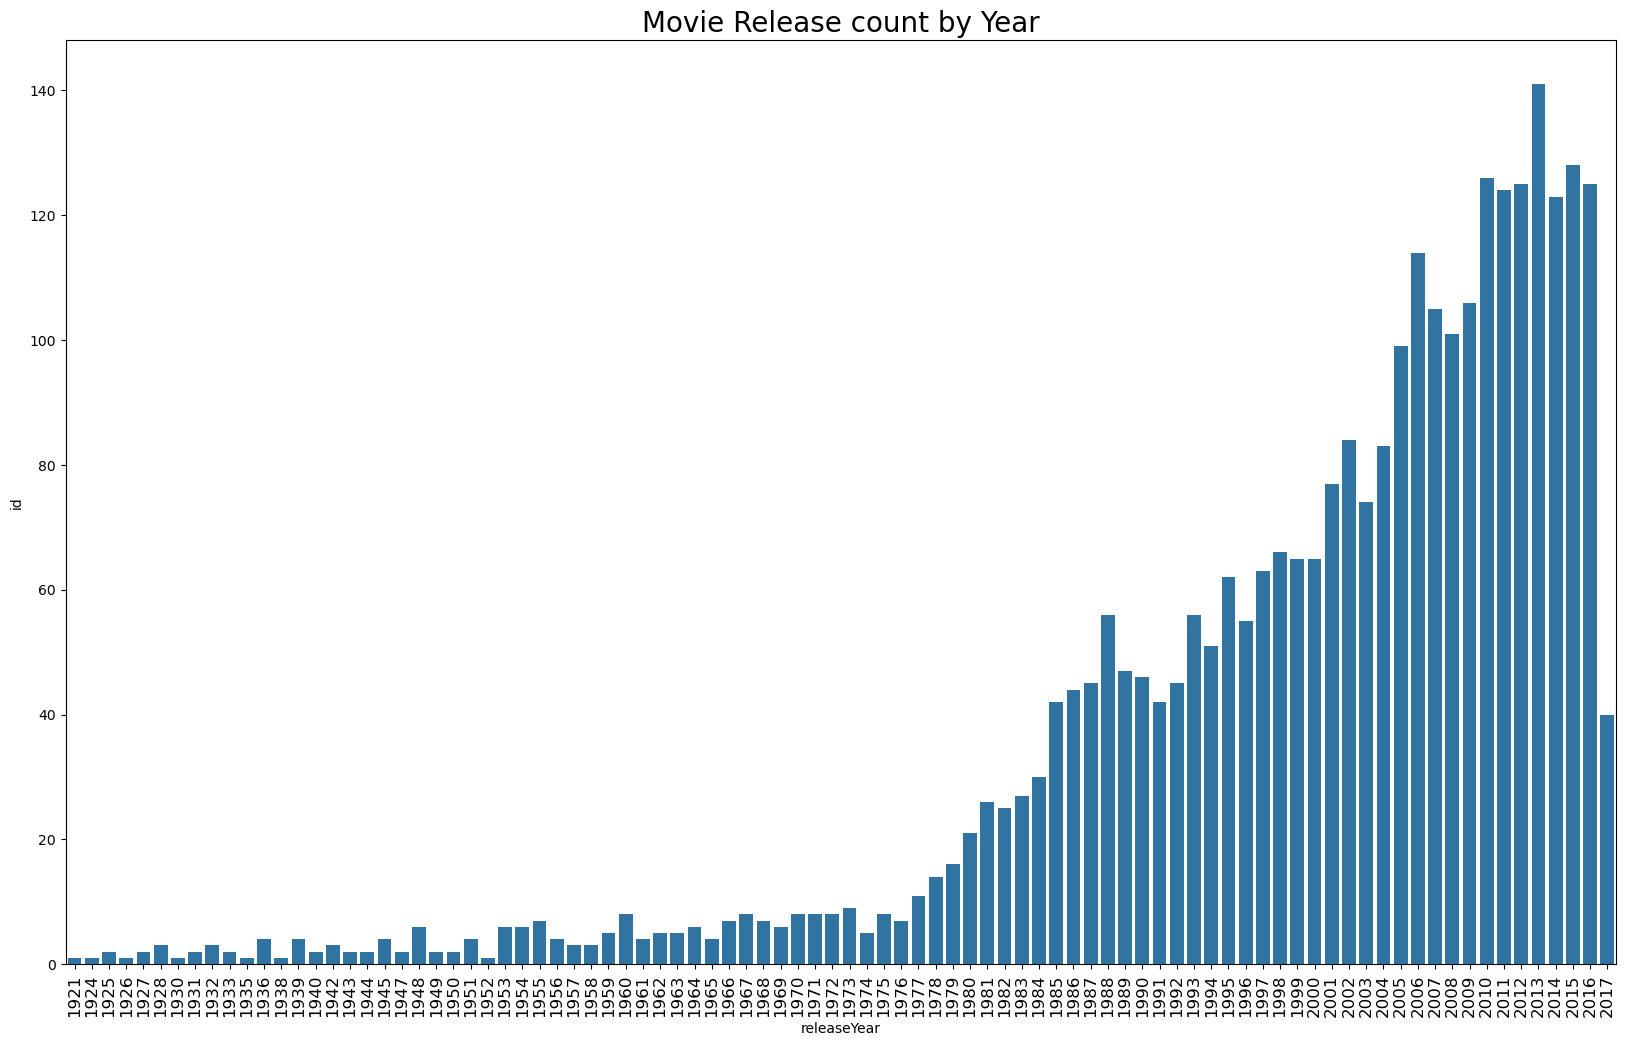

In [116]:
plt.figure(figsize=(20,12))
sns.barplot(df_train.groupby("releaseYear").count()["id"])
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

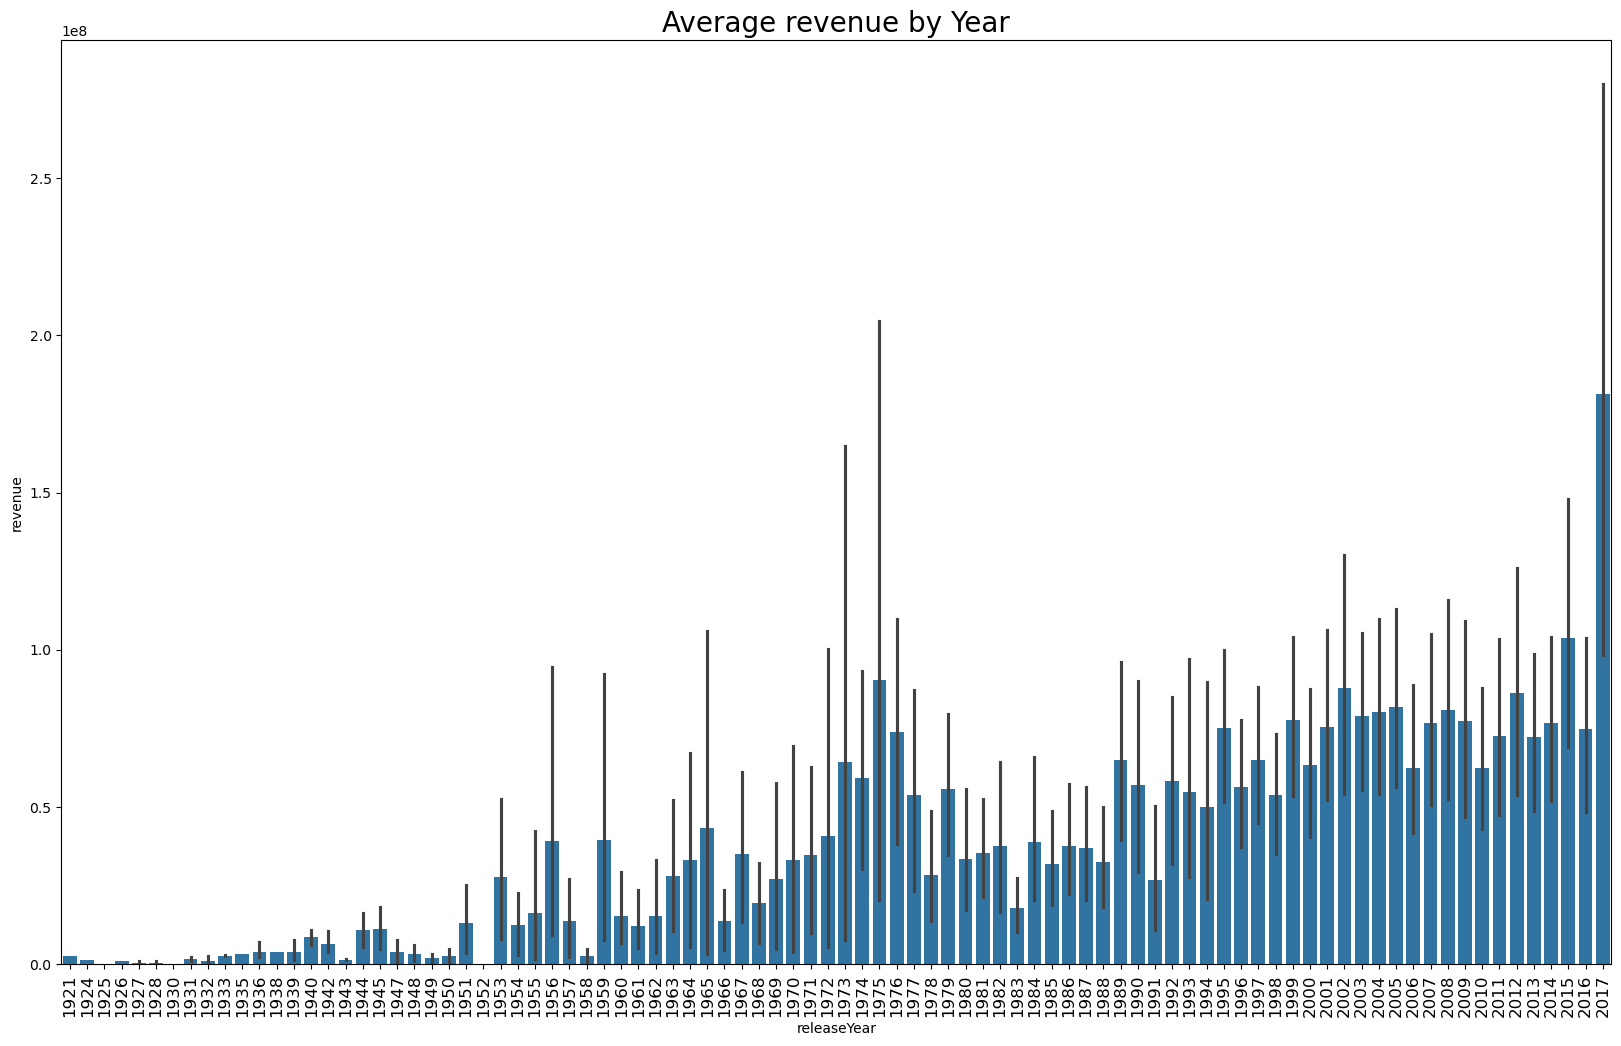

In [117]:
plt.figure(figsize=(20,12))
# sns.barplot(df_train[["releaseMonth", "revenue"]].groupby("releaseMonth").mean()["revenue"])
sns.barplot(data = df_train, x = "releaseYear", y = "revenue", errorbar = "ci")
plt.title("Average revenue by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

In [118]:
df_train["before_50"] = df_train["releaseYear"].map(lambda x: x < 1950).astype(int)
df_train["50s"] = df_train["releaseYear"].map(lambda x: 1950 <= x and x < 1960).astype(int)
df_train["60s"] = df_train["releaseYear"].map(lambda x: 1960 <= x and x < 1970).astype(int)
df_train["70s"] = df_train["releaseYear"].map(lambda x: 1970 <= x and x < 1980).astype(int)
df_train["80s"] = df_train["releaseYear"].map(lambda x: 1980 <= x and x < 1990).astype(int)
df_train["90s"] = df_train["releaseYear"].map(lambda x: 1990 <= x and x < 2000).astype(int)
df_train["2000"] = df_train["releaseYear"].map(lambda x: 2000 <= x and x < 2010).astype(int)
df_train["2010s"] = df_train["releaseYear"].map(lambda x: 2010 <= x).astype(int)

df_train.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,releaseDay,releaseYear,before_50,50s,60s,70s,80s,90s,2000,2010s
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,20,2015,0,0,0,0,0,0,0,1
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,6,2004,0,0,0,0,0,0,1,0
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10,2014,0,0,0,0,0,0,0,1
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,9,2012,0,0,0,0,0,0,0,1
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,5,2009,0,0,0,0,0,0,1,0


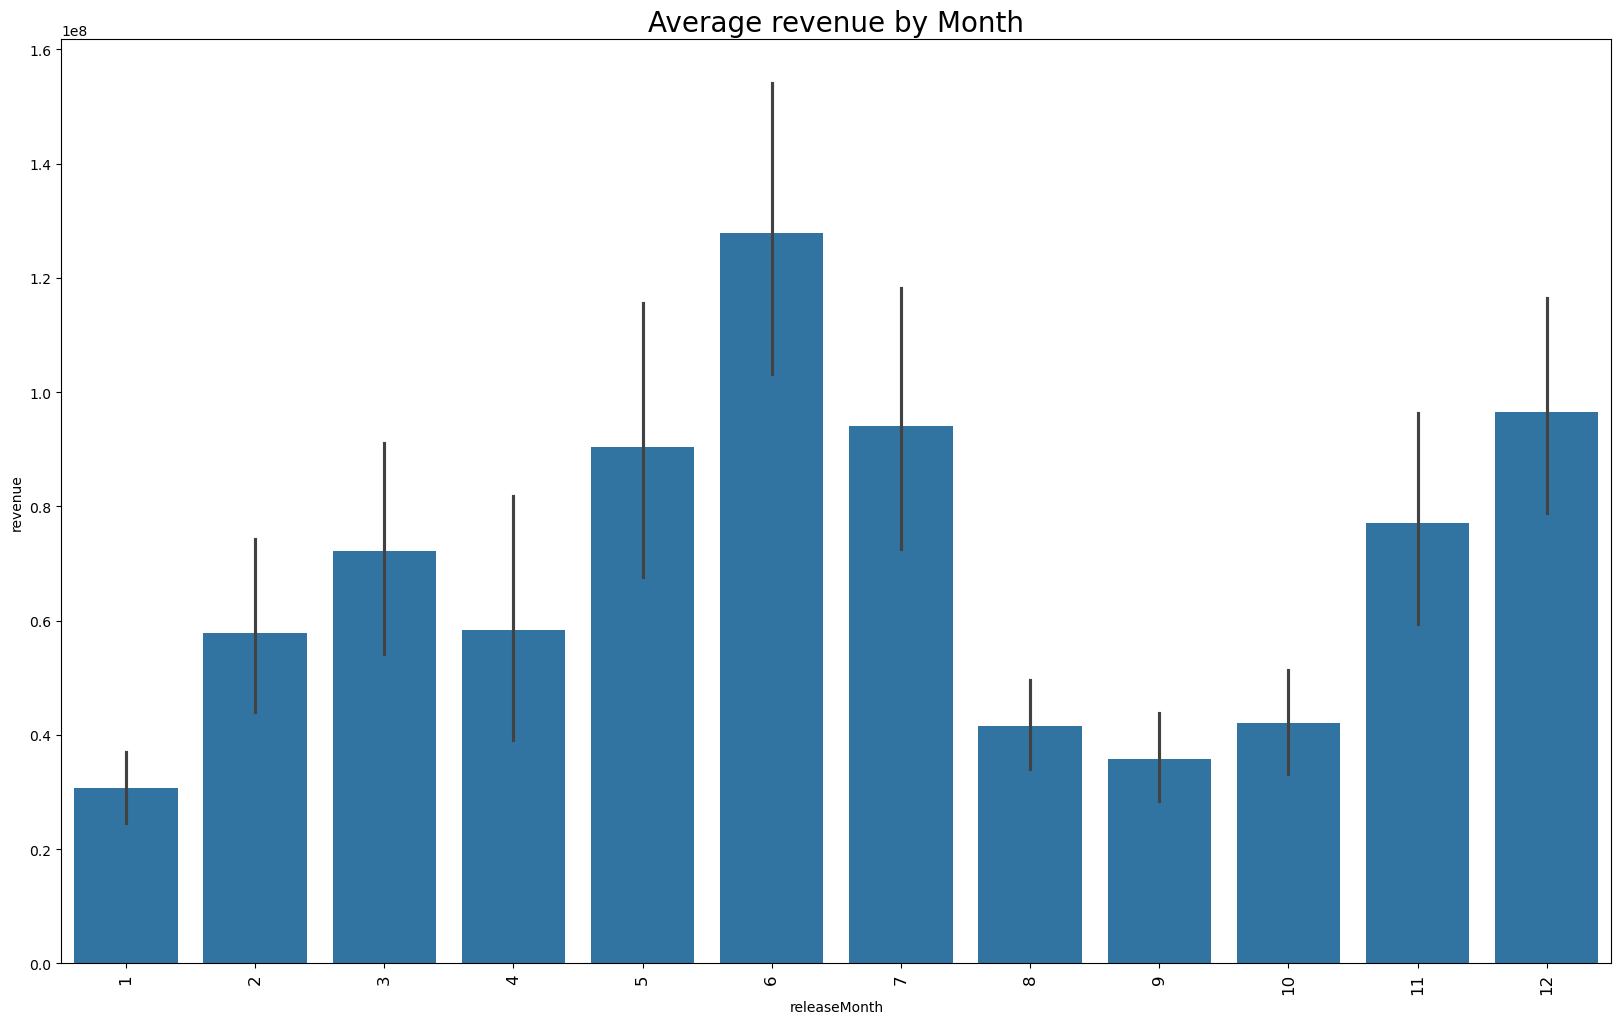

In [119]:
plt.figure(figsize=(20,12))
# sns.barplot(df_train[["releaseMonth", "revenue"]].groupby("releaseMonth").mean()["revenue"])
sns.barplot(data = df_train, x = "releaseMonth", y = "revenue", errorbar = "ci")
plt.title("Average revenue by Month",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

In [120]:
def movie_seasons(x):
    months = [3,5,6,7,11,12]
    if x in months:
        return 1.0
    return 0.0

df_train["movie_seasons"] = df_train["releaseMonth"].map(lambda x: movie_seasons(x))

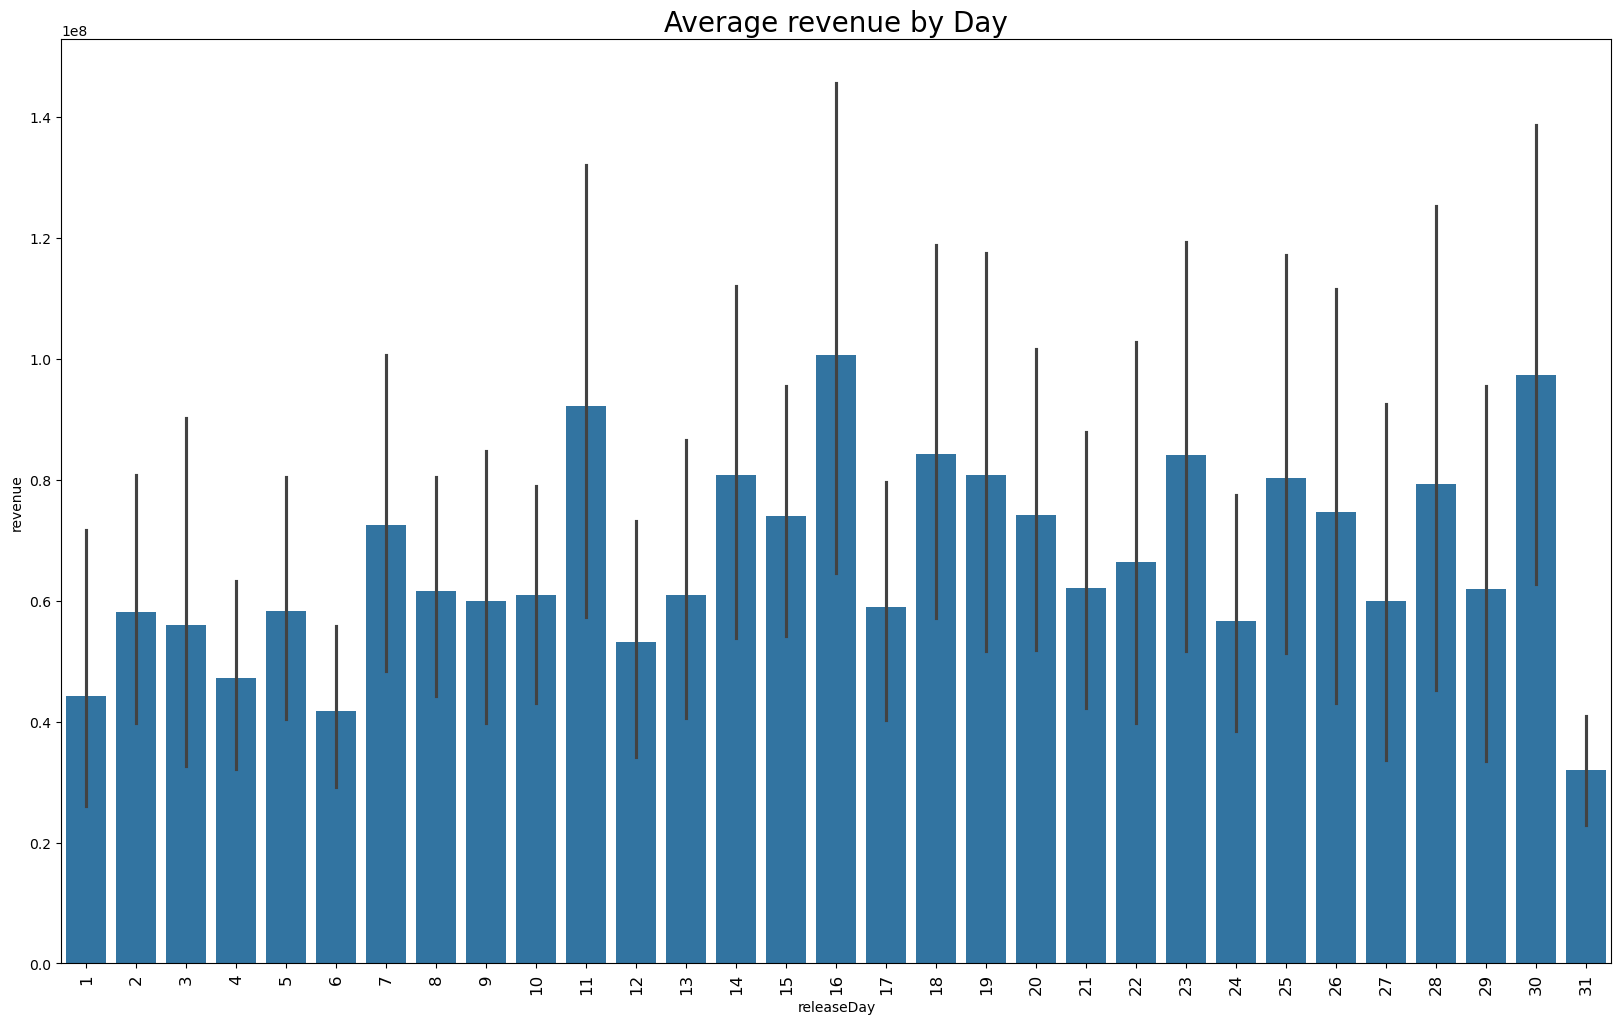

In [121]:
plt.figure(figsize=(20,12))
# sns.barplot(df_train[["releaseMonth", "revenue"]].groupby("releaseMonth").mean()["revenue"])
sns.barplot(data = df_train, x = "releaseDay", y = "revenue", errorbar = "ci")
plt.title("Average revenue by Day",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

Text(0, 0.5, 'Average revenue')

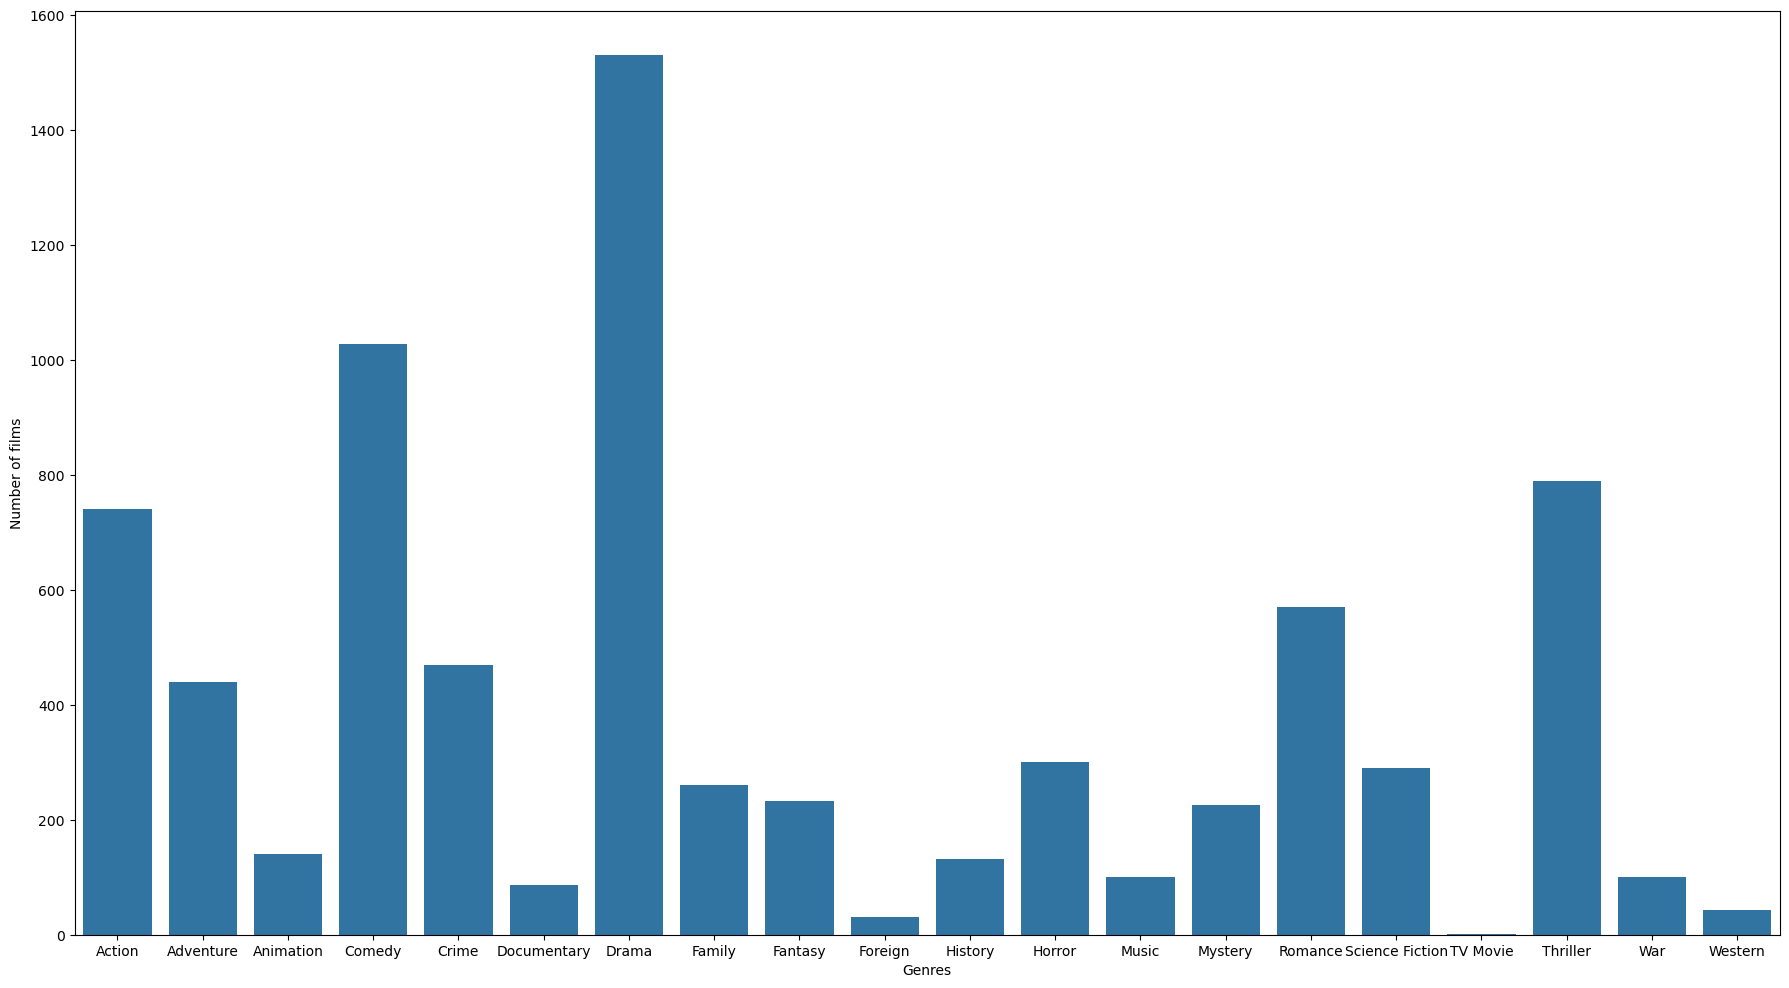

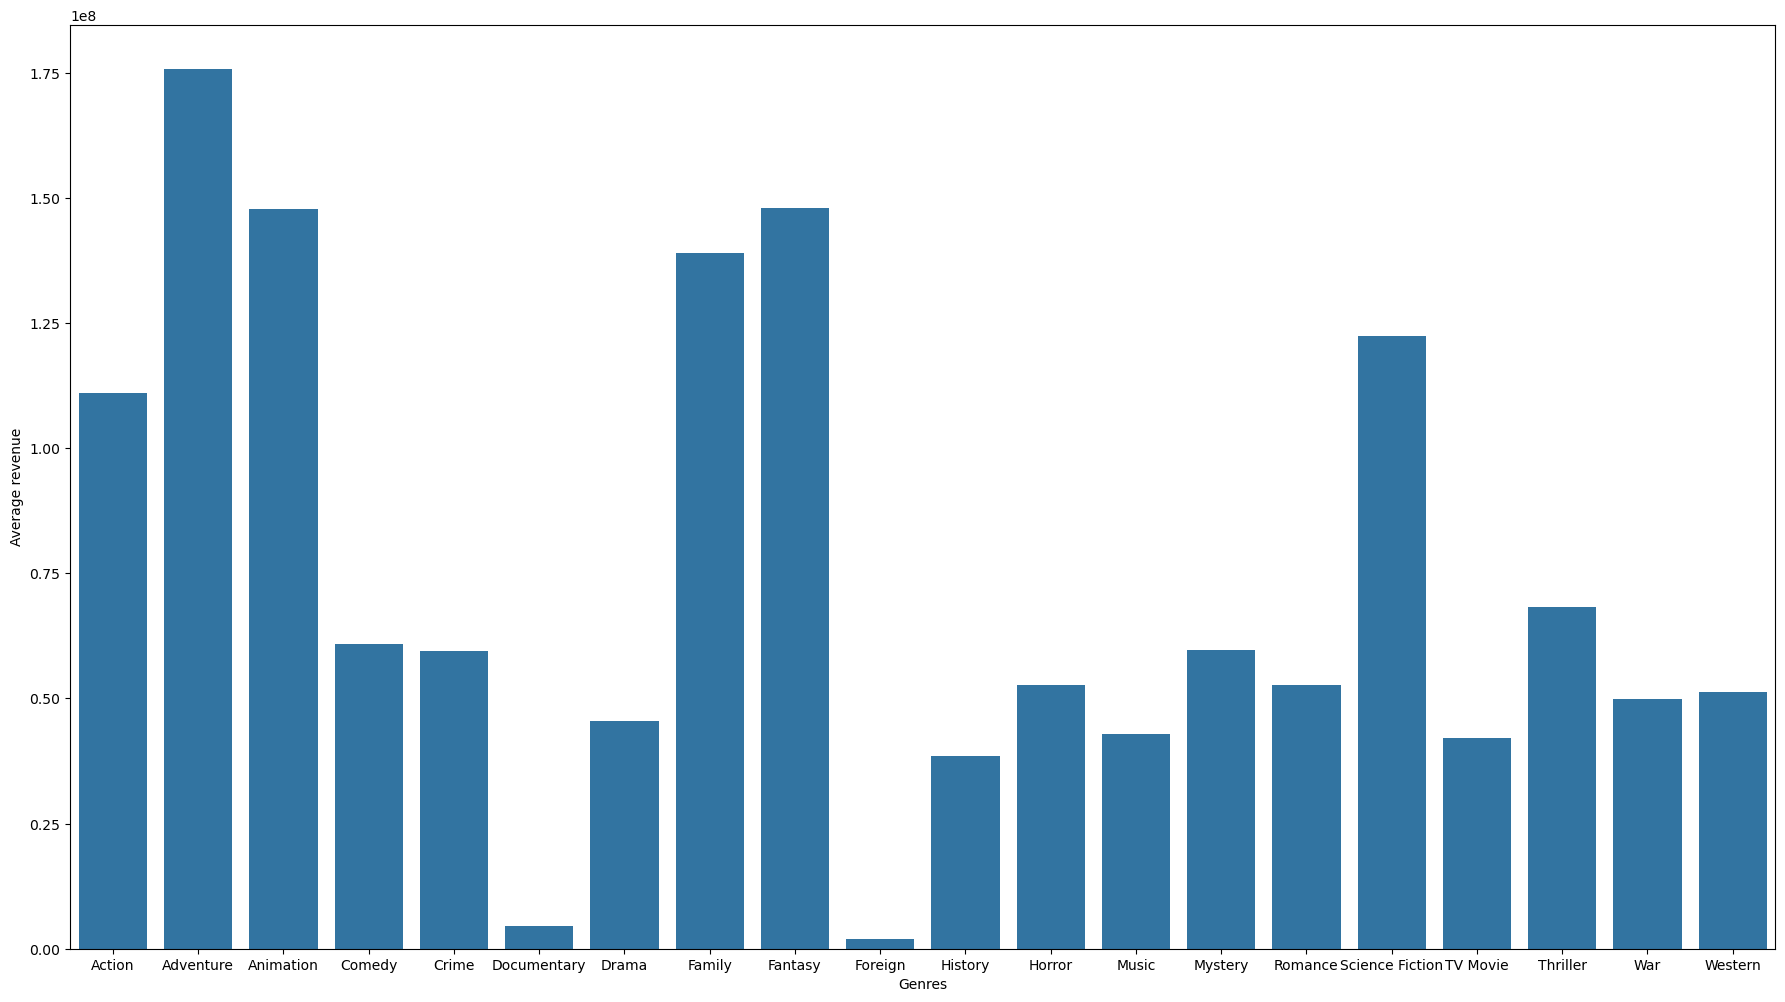

In [122]:
def extract_genre(x):
    try:
        d = eval(x)
    except:
        d = {}
    return d

def extract_genre_list(x):
    result = [register["name"] for register in x]
    result.sort()
    return ','.join(result)

df_train["movie_genres"] = df_train["genres"].map(lambda x: extract_genre(x)).map(lambda x: extract_genre_list(x))
all_genres = df_train["movie_genres"].str.get_dummies(sep=',')
df_train[all_genres.columns] = all_genres
plt.figure(figsize = (22,12))
sns.barplot(x = all_genres.columns, y = all_genres.sum(axis = 0))
plt.xlabel("Genres")
plt.ylabel("Number of films")

plt.figure(figsize = (22,12))
sns.barplot(x = all_genres.columns, y = [df_train[df_train[genre] == 1]["revenue"].mean() for genre in all_genres.columns])
plt.xlabel("Genres")
plt.ylabel("Average revenue")

Text(0, 0.5, 'Average revenue')

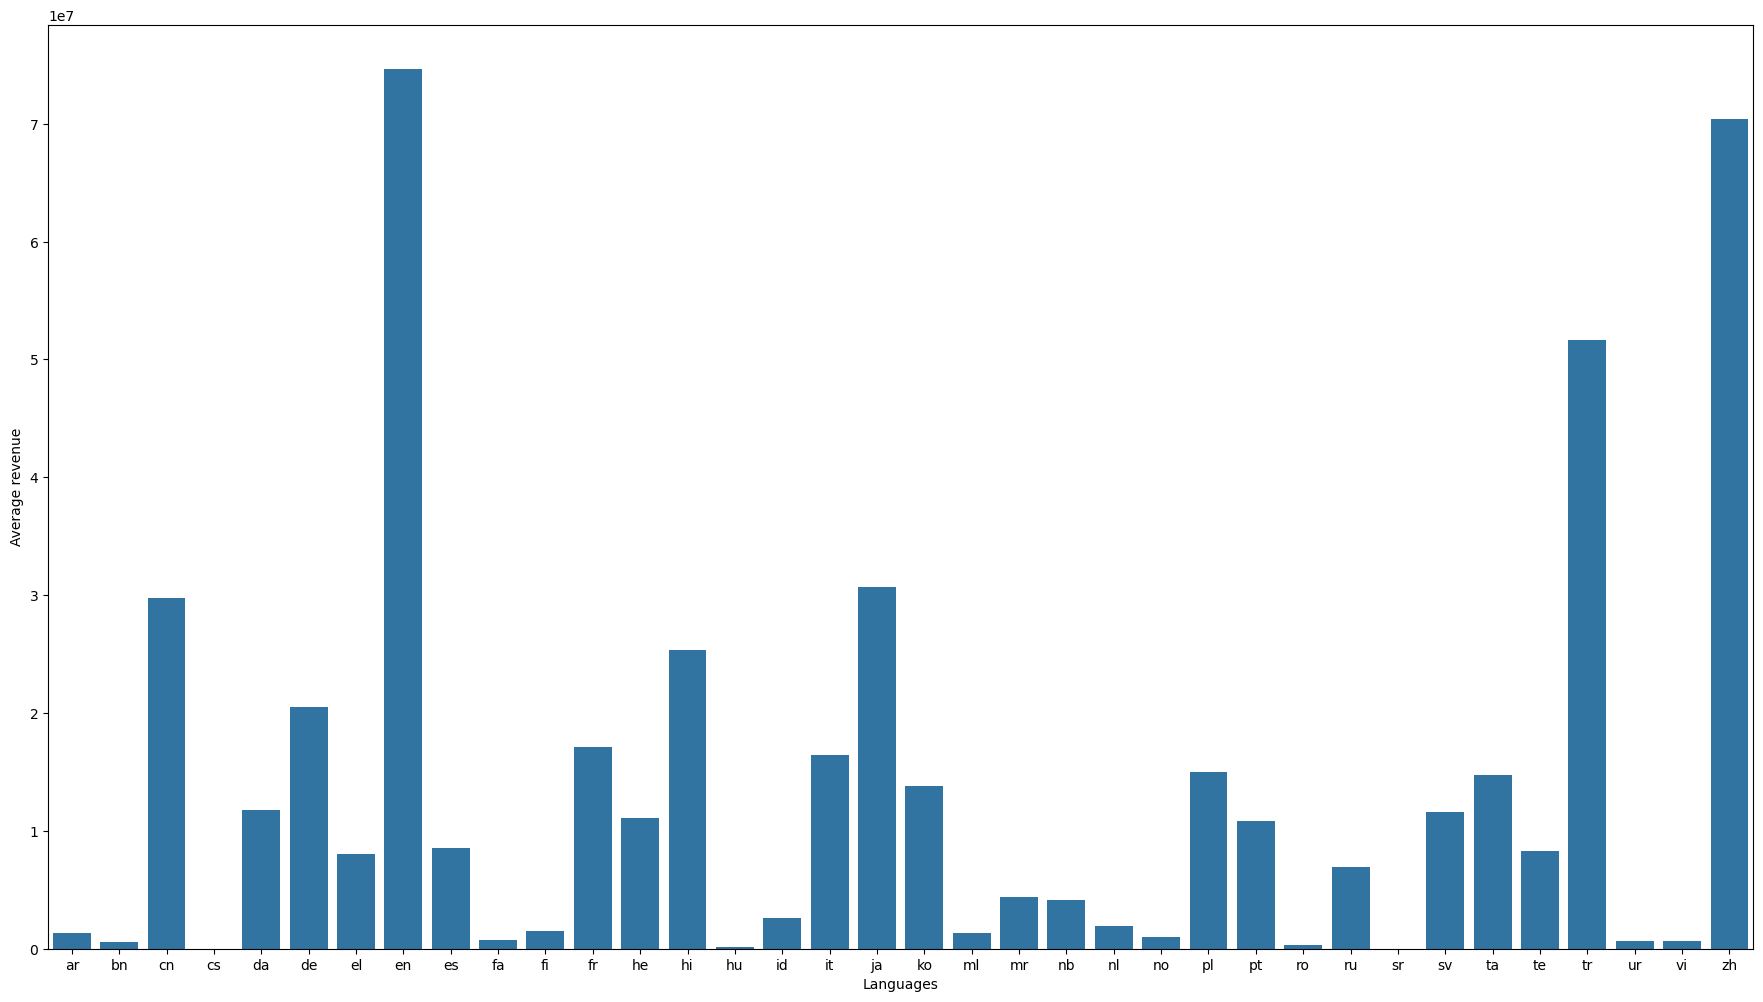

In [123]:
languages = pd.get_dummies(df_train["original_language"], dtype = float)
df_train[languages.columns] = languages
plt.figure(figsize = (22,12))
sns.barplot(x = languages.columns, y = [df_train[df_train[langage] != 0]["revenue"].mean() for langage in languages.columns])
plt.xlabel("Languages")
plt.ylabel("Average revenue")

In [124]:
df_train["has_homepage"] = 1.0
df_train.loc[df_train["homepage"].isna(), "has_homepage"] = 0.0
print(df_train["has_homepage"])

0       0.0
1       0.0
2       1.0
3       1.0
4       0.0
       ... 
2995    0.0
2996    0.0
2997    0.0
2998    1.0
2999    1.0
Name: has_homepage, Length: 3000, dtype: float64


In [125]:
df_train["has_poster"] = 1.0 - df_train["poster_path"].isna()

# 4 Preprocessing data

We already transformed many columns to numeric format. We also remove unnecessary ones.

In [146]:
# Recast the type of certain columns
df_train.budget = df_train.budget.astype(float)
df_train.revenue = df_train.revenue.astype(float)
df_test.budget = df_test.budget.astype(float)

dropped_columns = ["id", "belongs_to_collection", "genres", "homepage", "imdb_id", "overview", "poster_path", "production_companies", 
                   "production_countries", "release_date", "spoken_languages", "status", "tagline", "title", "cast", "crew", "movie_genres",
                   "Keywords", "logRevenue", "original_language", "original_title", "releaseDay", "releaseMonth", "releaseYear"] 
compact_df_train = df_train.drop(columns = dropped_columns)
mode_runtime = scipy.stats.mode(compact_df_train["runtime"].values).mode
compact_df_train.fillna(value = {"runtime": mode_runtime}, inplace = True)
compact_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 70 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   budget           3000 non-null   float64
 1   popularity       3000 non-null   float64
 2   runtime          3000 non-null   float64
 3   revenue          3000 non-null   float64
 4   before_50        3000 non-null   int64  
 5   50s              3000 non-null   int64  
 6   60s              3000 non-null   int64  
 7   70s              3000 non-null   int64  
 8   80s              3000 non-null   int64  
 9   90s              3000 non-null   int64  
 10  2000             3000 non-null   int64  
 11  2010s            3000 non-null   int64  
 12  movie_seasons    3000 non-null   float64
 13  Action           3000 non-null   int64  
 14  Adventure        3000 non-null   int64  
 15  Animation        3000 non-null   int64  
 16  Comedy           3000 non-null   int64  
 17  Crime         

Next, we consider four specific columns: __budget__, __popularity__, __runtime__ and __revenue__ since their ranges are very wide (up to $10^8$ or $10^9$). This presents a challenge for numerical (optimization) methods. Therefore, a very useful pratice is to __normalize__ the data before learning. This is done as follows.

In [147]:
compact_df_train[["budget", "popularity", "revenue", "runtime"]].describe()

,budget,popularity,revenue,runtime
count,3.000000e+03,3000.000000,3.000000e+03,3000.000000
mean,2.253133e+07,8.463274,6.672585e+07,107.844667
std,3.702609e+07,12.104000,1.375323e+08,22.083880
min,0.000000e+00,0.000001,1.000000e+00,0.000000
25%,0.000000e+00,4.018053,2.379808e+06,94.000000
50%,8.000000e+06,7.374861,1.680707e+07,104.000000
75%,2.900000e+07,10.890983,6.891920e+07,118.000000
max,3.800000e+08,294.337037,1.519558e+09,338.000000


In [ ]:
budget_scaler = preprocessing.StandardScaler()
budget_scaler.fit(compact_df_train[["budget"]])
compact_df_train[["budget"]] = budget_scaler.transform(compact_df_train[["budget"]])

popularity_scaler = preprocessing.StandardScaler()
popularity_scaler.fit(compact_df_train[["popularity"]])
compact_df_train[["popularity"]] = popularity_scaler.transform(compact_df_train[["popularity"]])

epsilon = 1e-5
compact_df_train[["revenue"]] = np.log(compact_df_train[["revenue"]] + epsilon)

runtime_scaler = preprocessing.StandardScaler()
runtime_scaler.fit(compact_df_train[["runtime"]])
compact_df_train[["runtime"]] = runtime_scaler.transform(compact_df_train[["runtime"]])

In [149]:
compact_df_train[["budget", "popularity", "revenue", "runtime"]].describe()

,budget,popularity,revenue,runtime
count,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03
mean,1.539509e-17,8.674543e-17,6.672585e+07,-9.355479e-17
std,1.000167e+00,1.000167e+00,1.375323e+08,1.000167e+00
min,-6.086274e-01,-6.993295e-01,1.000000e+00,-4.884225e+00
25%,-6.086274e-01,-3.673135e-01,2.379808e+06,-6.270173e-01
50%,-3.925275e-01,-8.993673e-02,1.680707e+07,-1.741228e-01
75%,1.747348e-01,2.006042e-01,6.891920e+07,4.599294e-01
max,9.656118e+00,2.362206e+01,1.519558e+09,1.042361e+01


Prepare training and validation data

In [150]:
# x_train, x_val, y_train, y_val = model_selection.train_test_split(compact_df_train.drop(columns = ["revenue"]), compact_df_train["revenue"], test_size = 0.1)
x_train, y_train = compact_df_train.drop(columns = ["revenue"]), compact_df_train["revenue"]

In [151]:
model = svm.SVR()

param_grid = [
  {'C':  [0.05, 0.1, 0.2, 0.5, 1.0, 1.5, 2.0],
   'kernel': ["poly", "linear", "rbf"]}]

grid = model_selection.GridSearchCV(model, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [0.05, 0.1, 0.2, 0.5, 1.0, 1.5, 2.0],
                          'kernel': ['poly', 'linear', 'rbf']}],
             scoring='neg_mean_squared_error')

In [152]:
print(grid.best_params_)


{'C': 2.0, 'kernel': 'poly'}


In [153]:
x_train, x_val, y_train, y_val = model_selection.train_test_split(compact_df_train.drop(columns = ["revenue"]), compact_df_train["revenue"], test_size = 0.01)
best_model = grid.best_estimator_.fit(x_train, y_train)
# original_y_val = (np.exp(y_val.values.reshape((1, -1))))
# original_y_predict = np.exp(best_model.predict(x_val).reshape((1,-1)))
# print("Score: {}".format(np.sqrt(metrics.mean_squared_log_error(original_y_val, original_y_predict))))
# print(original_y_predict)
# print(np.ndarray.tolist(best_model.coef_))
# for coeff, col in zip(np.ndarray.tolist(best_model.coef_)[0], list(x_train.columns)):
#     print("{} : {}".format(col, coeff))
# print(best_model.intercept_)
# print(x_val[["budget", "popularity", "runtime"]])
# print(original_y_predict)

In [154]:
def data_preprocessing(df, scalers):
    df[["releaseMonth", "releaseDay", "releaseYear"]] = df.release_date.str.split('/',expand = True).replace(np.nan, -1).astype(int)
    df["releaseYear"] = df["releaseYear"].apply(lambda x: x + 2000 if x < 20 else x + 1900)

    df["before_50"] = df["releaseYear"].map(lambda x: x < 1950).astype(int)
    df["50s"] = df["releaseYear"].map(lambda x: 1950 <= x and x < 1960).astype(int)
    df["60s"] = df["releaseYear"].map(lambda x: 1960 <= x and x < 1970).astype(int)
    df["70s"] = df["releaseYear"].map(lambda x: 1970 <= x and x < 1980).astype(int)
    df["80s"] = df["releaseYear"].map(lambda x: 1980 <= x and x < 1990).astype(int)
    df["90s"] = df["releaseYear"].map(lambda x: 1990 <= x and x < 2000).astype(int)
    df["2000"] = df["releaseYear"].map(lambda x: 2000 <= x and x < 2010).astype(int)
    df["2010s"] = df["releaseYear"].map(lambda x: 2010 <= x).astype(int)
    
    df["movie_seasons"] = df["releaseMonth"].map(lambda x: movie_seasons(x))
    df["movie_genres"] = df["genres"].map(lambda x: extract_genre(x)).map(lambda x: extract_genre_list(x))
    all_genres = df["movie_genres"].str.get_dummies(sep=',')
    df[all_genres.columns] = all_genres

    languages = pd.get_dummies(df["original_language"], dtype = float)
    df[languages.columns] = languages

    df["has_homepage"] = 1.0
    df.loc[df["homepage"].isna(), "has_homepage"] = 0.0

    df["has_poster"] = 1.0 - df["poster_path"].isna()

    dropped_columns = ["id", "belongs_to_collection", "genres", "homepage", "imdb_id", "overview", "poster_path", "production_companies", 
                   "production_countries", "release_date", "spoken_languages", "status", "tagline", "title", "cast", "crew", "movie_genres",
                   "Keywords", "original_language", "original_title", "releaseDay", "releaseMonth", "releaseYear"] 
    
    df = df.drop(columns = dropped_columns)
    df.fillna(value = {"runtime": mode_runtime}, inplace = True)

    df[["budget"]] = scalers[0].transform(df[["budget"]])
    df[["popularity"]] = scalers[1].transform(df[["popularity"]])
    df[["runtime"]] = scalers[2].transform(df[["runtime"]])
    return df

In [155]:
compact_df_test = data_preprocessing(df_test, [budget_scaler, popularity_scaler, runtime_scaler])
compact_df_test.info()
compact_df_test.drop(columns = [col for col in compact_df_test.columns if not (col in compact_df_train.columns)], inplace = True)
compact_df_test[[col for col in compact_df_train.columns if not (col in compact_df_test.columns)]] = 0.0
x_test = compact_df_test[compact_df_train.columns]
x_test.drop(columns = ["revenue"], inplace = True)
x_test.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   budget           4398 non-null   float64
 1   popularity       4398 non-null   float64
 2   runtime          4398 non-null   float64
 3   before_50        4398 non-null   int64  
 4   50s              4398 non-null   int64  
 5   60s              4398 non-null   int64  
 6   70s              4398 non-null   int64  
 7   80s              4398 non-null   int64  
 8   90s              4398 non-null   int64  
 9   2000             4398 non-null   int64  
 10  2010s            4398 non-null   int64  
 11  movie_seasons    4398 non-null   float64
 12  Action           4398 non-null   int64  
 13  Adventure        4398 non-null   int64  
 14  Animation        4398 non-null   int64  
 15  Comedy           4398 non-null   int64  
 16  Crime            4398 non-null   int64  
 17  Documentary   

/var/folders/p4/_90wy99n6yz6nflm9fwlp5v00000gn/T/ipykernel_58008/1988220446.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.drop(columns = ["revenue"], inplace = True)


budget          0
popularity      0
runtime         0
before_50       0
50s             0
               ..
ur              0
vi              0
zh              0
has_homepage    0
has_poster      0
Length: 69, dtype: int64

In [ ]:
y_test_predict = np.exp(best_model.predict(x_test))
# y_test_predict = best_model.predict(x_test)

In [ ]:
print(y_test_predict)

[16728186.8714395  16728016.87331721 16728156.83558544 ...
 16728249.30269162 16728348.68323055 16728152.95244247]


In [158]:
results = pd.DataFrame({"id": [i + len(df_train) + 1 for i in range(len(df_test))], "revenue": y_test_predict})
print(results)

        id       revenue
0     3001  1.672819e+07
1     3002  1.672802e+07
2     3003  1.672816e+07
3     3004  1.672820e+07
4     3005  1.672813e+07
...    ...           ...
4393  7394  1.672832e+07
4394  7395  1.672823e+07
4395  7396  1.672825e+07
4396  7397  1.672835e+07
4397  7398  1.672815e+07

[4398 rows x 2 columns]


In [159]:
results.to_csv("results.csv", index = False)